In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
file_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(file_path)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
from xgboost import XGBRegressor

In [13]:
print(df.columns)

Index(['Bagerhat',       2019,       20.0,      22.68,     26.655,      29.47,
            31.44,     30.825,     30.225,      29.81,      29.36,     28.305,
           25.235,      20.53,        0.0,      100.0,       41.0,      101.0,
             82.0,      286.0,      301.0,      389.0,      290.0,       97.0,
            265.0,       11.0,      71.52,      71.75,      72.61,      76.13,
            77.87,      83.83,      86.94,      86.97,      88.27,      85.81,
            83.23,      80.13,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,       1126,        114,         34,
             16.0,        8.0],
      dtype='object', name=0)


In [15]:
df = df.drop(columns=['Year'], errors='ignore')

In [29]:
df.fillna(df.mean(numeric_only=True), inplace=True)

label_encoder = LabelEncoder()
df['District'] = label_encoder.fit_transform(df['District'])

X = df.drop(columns=['Year'])
Y = df['Year']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [35]:
model = XGBRegressor(n_estimators = 10, random_state = 42)

In [38]:
result = []
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

result.append({'MAE': mae,
               'MSE': mse,
               'R2': r2})

In [40]:
print(result)

[{'MAE': 0.3516354251217532, 'MSE': 0.5243783492546576, 'R2': 0.8040686249732971}]


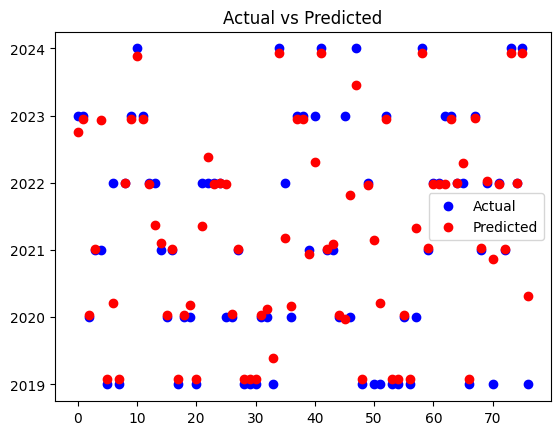

In [42]:
plt.scatter(range(len(Y_test)), Y_test, color = 'blue', label = 'Actual')
plt.scatter(range(len( Y_pred)), Y_pred, color = 'red', label = 'Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

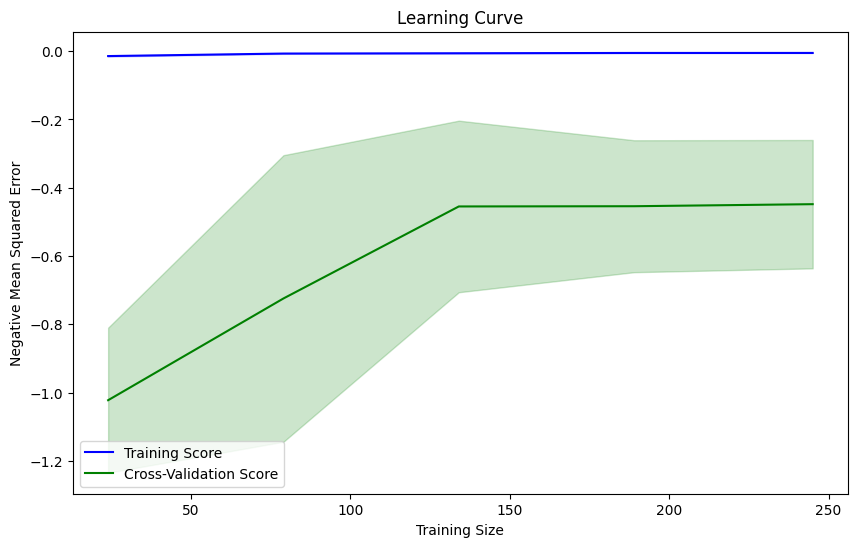

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    Y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green')

# Plot standard deviation as shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.show()
